In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score

In [31]:
used_car = pd.read_csv('DATASET/used_car.csv')
used_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   car name                   609 non-null    object 
 1   brand                      609 non-null    object 
 2   year                       609 non-null    int64  
 3   mileage (km)               609 non-null    float64
 4   location                   609 non-null    object 
 5   transmission               609 non-null    object 
 6   plate type                 609 non-null    object 
 7   rear camera                609 non-null    int64  
 8   sun roof                   609 non-null    int64  
 9   auto retract mirror        609 non-null    int64  
 10  electric parking brake     609 non-null    int64  
 11  map navigator              609 non-null    int64  
 12  vehicle stability control  609 non-null    int64  
 13  keyless push start         609 non-null    int64  

In [32]:
used_car.head()

,car name,brand,year,mileage (km),location,transmission,plate type,rear camera,sun roof,auto retract mirror,electric parking brake,map navigator,vehicle stability control,keyless push start,sports mode,360 camera view,power sliding door,auto cruise control,price (Rp),instalment (Rp|Monthly)
0,AYLA X 1.2,Daihatsu,2018,10.508,Jakarta Utara,Manual,even plate,0,0,0,0,0,0,0,0,0,0,0,101000000,2060000
1,AGYA TRD SPORTIVO 1.0,Toyota,2015,112.888,Bogor,Manual,even plate,0,0,0,0,0,0,0,0,0,0,0,82000000,1670000
2,X-TRAIL 2.5,Nissan,2015,118.429,Surabaya,Automatic,odd plate,0,0,0,0,0,0,1,0,1,0,0,169000000,3440000
3,YARIS S TRD 1.5,Toyota,2020,15.945,Tangerang Selatan,Automatic,odd plate,0,0,0,0,0,0,0,0,0,0,0,218000000,4440000
4,AGYA G 1.2,Toyota,2019,30.404,Jakarta Barat,Manual,odd plate,0,0,0,0,0,0,0,0,0,0,0,117000000,2380000


In [33]:
selected_column = ['car name', 'brand', 'location', 'transmission', 'plate type']
used_car = pd.get_dummies(used_car, columns=selected_column)
used_car.head()

,year,mileage (km),rear camera,sun roof,auto retract mirror,electric parking brake,map navigator,vehicle stability control,keyless push start,sports mode,...,location_Jakarta Timur,location_Jakarta Utara,location_Malang,location_Surabaya,location_Tangerang Selatan,location_Unknown,transmission_Automatic,transmission_Manual,plate type_even plate,plate type_odd plate
0,2018,10.508,0,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,True,True,False
1,2015,112.888,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,True,False
2,2015,118.429,0,0,0,0,0,0,1,0,...,False,False,False,True,False,False,True,False,False,True
3,2020,15.945,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,True,False,False,True
4,2019,30.404,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,True


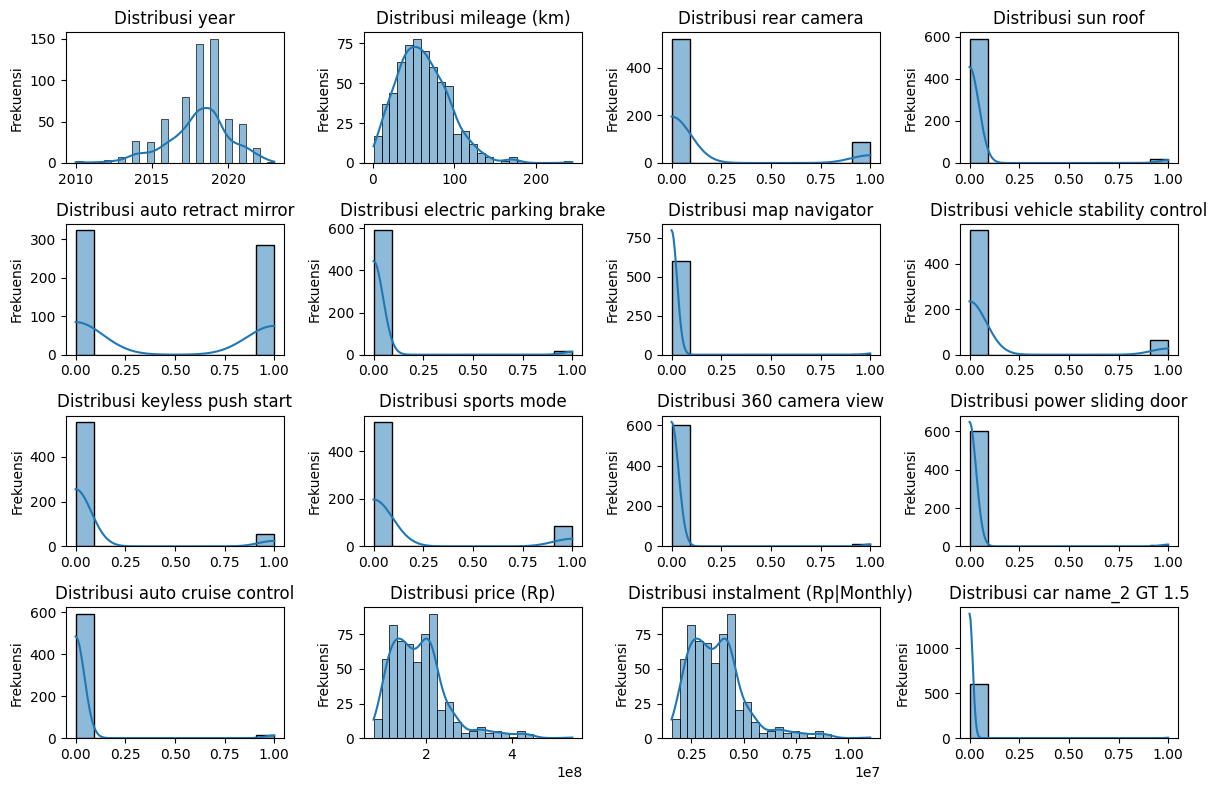

In [34]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 8))
for kolom, ax in zip(used_car.columns, axes.flatten()):
    sns.histplot(data=used_car, x=kolom, kde=True, ax=ax)
    ax.set_title(f'Distribusi {kolom}')
    ax.set_xlabel('')
    ax.set_ylabel('Frekuensi')
plt.tight_layout()
plt.show()

In [35]:
X = used_car.drop('price (Rp)', axis=1)
y = used_car['price (Rp)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Jumlah data latih: {len(X_train)}')
print(f'Jumlah data uji: {len(X_test)}')
print(f'Dimensi data latih: {X_train.shape}')
print(f'Dimensi data uji: {X_test.shape}')

Jumlah data latih: 487
Jumlah data uji: 122
Dimensi data latih: (487, 216)
Dimensi data uji: (122, 216)


In [36]:
#Mencari parameter yang bagus atau tuning parameter
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_leaf' : [1,2,4]
}

#Berapa kemungkinan yang dicoba
# 3 (n_estimators) * 3 (max_depth) * 3 (min_samples_leaf) * 2 (max_features) = 54 kombinasi

In [37]:
model = RandomForestRegressor(random_state=42)
gridSearch = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
gridSearch.fit(X_train, y_train)
print('Proses grid search telah selesai')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Proses grid search telah selesai


In [38]:
print('Parameter terbaik adalah: ', gridSearch.best_params_)

Parameter terbaik adalah:  {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 150}


In [39]:
best_model = gridSearch.best_estimator_
y_pred = best_model.predict(X_test)

#Evaluation
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

print(f'Prediksi harga mobil:', y_pred[0])

Root Mean Squared Error: 3002394.9524337477
R-squared: 0.998237518860389
Prediksi harga mobil: 281347253.9682541
